In [10]:
import os
import sys
import datetime

import numpy as np
import matplotlib.pyplot as plt

from sentinelhub import SHConfig

from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, \
    DataCollection, bbox_to_dimensions, DownloadRequest, WmsRequest

In [11]:
def plot_image(image, factor=1.0, clip_range = None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


In [12]:
config = SHConfig()
SECRET = '{kO.}+2<dSC02pNt:ENYRyyS6|B*.Ax9&LIlaLmO'
CLIENT_ID = 'df321db5-a8ff-4817-abd9-87e5681d6e73'
INSTANCE_ID = '9893d95e-cd0e-48d5-9577-587781157d7a'
# ACCOUNT_ID  = 'b2af57d8-85c8-42f3-8849-163092da544a'
config.instance_id = INSTANCE_ID
config.sh_client_id = CLIENT_ID
config.sh_client_secret = SECRET
config.save()


Image shape at 60 m resolution: (268, 246) pixels
Image type: uint8


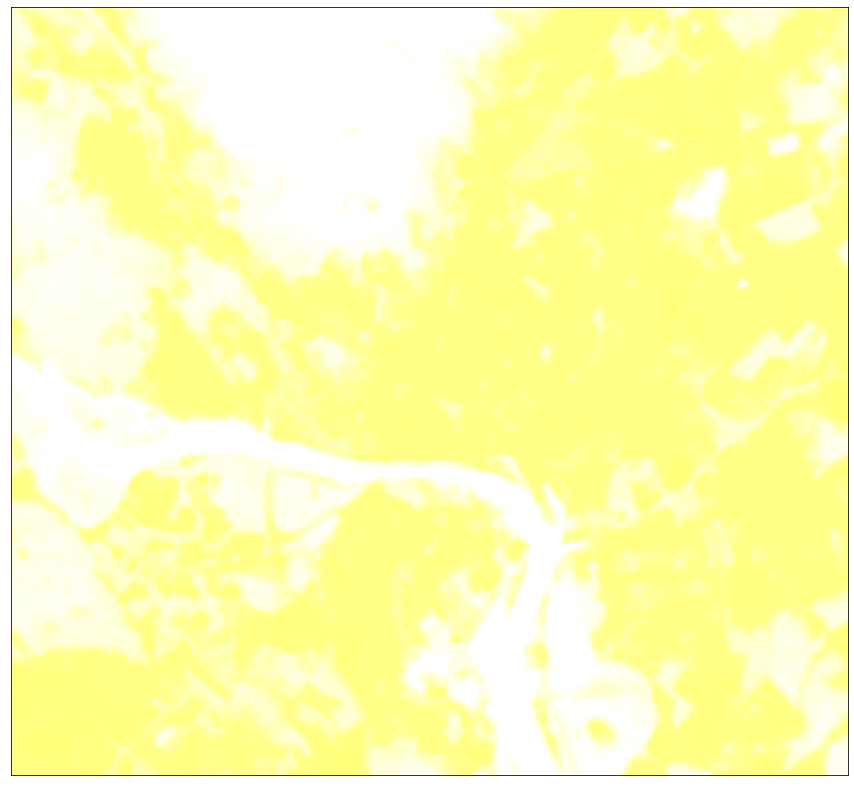

In [13]:
BBox(bbox=[17.006149, 48.087483, 17.227249, 48.21598], crs=CRS.WGS84)
betsiboka_coords_wgs84 =[17.006149, 48.087483, 17.227249, 48.21598]
resolution = 60
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
betsiboka_size = bbox_to_dimensions(betsiboka_bbox, resolution=resolution)

print(f'Image shape at {resolution} m resolution: {betsiboka_size} pixels')


evalscript_true_color = """
//VERSION=3 (auto-converted from 1)

    const blue_red = [
      [223, 0x003d99],
      [253, 0x2e82ff],
      [263, 0x80b3ff],
      [272, 0xe0edff],
      [273, 0xffffff],
      [274, 0xfefce7],
      [283, 0xFDE191],
      [293, 0xf69855],
      [303, 0xec6927],
      [323, 0xaa2d1d],
      [363, 0x650401],
      [373, 0x3d0200],
    ];

    const viz = new ColorRampVisualizer(blue_red);

    function evaluatePixel(samples) {
      let val = samples.B10;
      return [...viz.process(val), samples.dataMask];
    }

    function setup() {
      return {
        input: [{
          bands: ["B10", "dataMask"]
        }],
        output: { bands: 4 }  }
    }

"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.LANDSAT_OT_L1,
            time_interval=('2020-07-01', '2020-07-30'),
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=betsiboka_bbox,
    size=betsiboka_size,
    config=config
)

true_color_imgs = request_true_color.get_data()

image = true_color_imgs[0]
print(f'Image type: {image.dtype}')

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=3.5/255, clip_range=(0,1))